# **Housing Price Prediction**

**Description: Predict house prices based on features like area, number of
bedrooms, and location**

Data Exploration

In [602]:
import pandas as pd

#for removing warnings:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [603]:
df = pd.read_csv('/content/data.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


We can see that our dataset have 4600 rows and 18 columns

In [604]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [605]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [606]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [607]:
print("Shape of DataSet : ",df.shape)

Shape of DataSet :  (4600, 18)


In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [609]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Data Cleaning :

In [610]:
# check for duplicate rows:
df.duplicated().sum()

0

In [611]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [612]:
df['date'].value_counts()

2014-06-23 00:00:00    142
2014-06-25 00:00:00    131
2014-06-26 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-06-07 00:00:00      4
2014-07-06 00:00:00      3
2014-07-04 00:00:00      2
2014-05-11 00:00:00      2
2014-05-17 00:00:00      1
Name: date, Length: 70, dtype: int64

In [613]:
df['country'].value_counts()

USA    4600
Name: country, dtype: int64

In [614]:
df['street'].value_counts()

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64

All values for "country" are "USA" and values of "street" are distinct so remove that columns

In [615]:
df.drop(['date','country','street','statezip','city'],axis = 1,inplace = True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [616]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
dtype: object

Visualizing the Data Distribution

<Axes: xlabel='bedrooms', ylabel='price'>

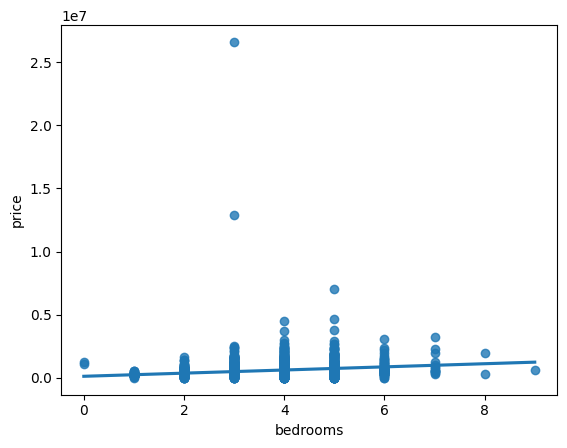

In [618]:
sns.regplot(x = 'bedrooms', y = 'price',data=df)

<Axes: xlabel='bathrooms', ylabel='price'>

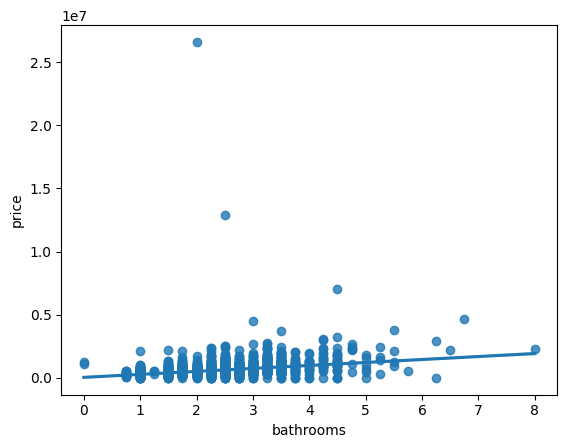

In [619]:
sns.regplot(x = 'bathrooms', y = 'price',data=df)

<Axes: xlabel='floors', ylabel='price'>

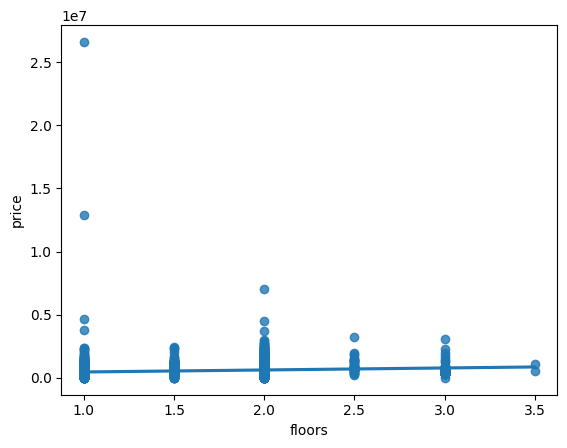

In [620]:
sns.regplot(x = 'floors', y = 'price',data=df)

Splitting dataset :

In [621]:
X = df.iloc[:,1:]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [622]:
y = df.iloc[:,0]
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

Applying StandardScaler and then Train Test Split :

In [623]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.44112227, -0.84320364, -0.82997105, ..., -0.67246372,
        -0.53101376,  1.22167046],
       [ 1.75970468,  0.43280154,  1.56852826, ..., -0.06912828,
        -1.67469295, -0.82569345],
       [-0.44112227, -0.20520105, -0.21736733, ..., -0.67246372,
        -0.1609999 , -0.82569345],
       ...,
       [-0.44112227,  0.43280154,  0.90400897, ..., -0.67246372,
         1.2854179 , -0.82569345],
       [ 0.6592912 , -0.20520105, -0.05123751, ...,  1.5254011 ,
         0.10810108, -0.82569345],
       [-0.44112227,  0.43280154, -0.67422434, ..., -0.67246372,
         0.64630305, -0.82569345]])

In [624]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 43)

In [625]:
#checking shapes of each test sets :
print("Shape of X train : ",X_train.shape)
print("Shape of X test : ",X_test.shape)
print("Shape of y train : ",y_train.shape)
print("Shape of y test : ",y_test.shape)

Shape of X train :  (3680, 12)
Shape of X test :  (920, 12)
Shape of y train :  (3680,)
Shape of y test :  (920,)


Importing Data Models :

In [626]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np

Creating objects and applying for loop to get different measures and to check accuracy :

In [627]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=75,random_state=31)
dt = DecisionTreeRegressor(max_depth=3,random_state=31)
gb = GradientBoostingRegressor(n_estimators=75,random_state=31)

models = [lr,rf,dt,gb]

for i in models:
  print(i)
  i.fit(X_train,y_train)
  y_pred = i.predict(X_test)
  print("R2_score : ",r2_score(y_test,y_pred)*100)
  print("MeanAbsoluteError : ",mean_absolute_error(y_test,y_pred))
  print("MeanSquaredError : ",mean_squared_error(y_test,y_pred))
  print("RootMeanSquaredError : ",np.sqrt(mean_squared_error(y_test,y_pred)))
  print("_____________________________________________________________________")

LinearRegression()
R2_score :  52.31942586354508
MeanAbsoluteError :  159165.88417013048
MeanSquaredError :  74834240426.83936
RootMeanSquaredError :  273558.47716135456
_____________________________________________________________________
RandomForestRegressor(n_estimators=75, random_state=31)
R2_score :  46.008186754762235
MeanAbsoluteError :  159853.6689288994
MeanSquaredError :  84739674524.72334
RootMeanSquaredError :  291100.7978771672
_____________________________________________________________________
DecisionTreeRegressor(max_depth=3, random_state=31)
R2_score :  47.71220846109661
MeanAbsoluteError :  171928.89570874008
MeanSquaredError :  82065227491.02283
RootMeanSquaredError :  286470.2907650684
_____________________________________________________________________
GradientBoostingRegressor(n_estimators=75, random_state=31)
R2_score :  33.075028079895304
MeanAbsoluteError :  167902.270236347
MeanSquaredError :  105038152957.12701
RootMeanSquaredError :  324095.9008644309
__

Trying PCA(Principal Component Analysis) method to check if we can improve the accuracy a little bit :

In [628]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_p = pca.fit_transform(X_train)
X_test_p = pca.transform(X_test)

In [629]:
X_train_p.shape

(3680, 12)

In [630]:
pca.explained_variance_ratio_

array([3.19485654e-01, 1.69073852e-01, 1.05986539e-01, 9.54667753e-02,
       7.27344600e-02, 6.34397508e-02, 5.27045559e-02, 3.76321333e-02,
       3.32392785e-02, 3.14840201e-02, 1.87529812e-02, 8.51331177e-33])

In [631]:
pca = PCA(n_components = 3 )
X_train_p = pca.fit_transform(X_train_p)
X_test_p = pca.transform(X_test_p)

In [632]:
X_train_p.shape

(3680, 3)

In [633]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=75,random_state=31)
dt = DecisionTreeRegressor(max_depth=3,random_state=31)
gb = GradientBoostingRegressor(n_estimators=75,random_state=31)

models = [lr,rf,dt,gb]

for i in models:
  print(i)
  i.fit(X_train,y_train)
  y_pred = i.predict(X_test)
  print("R2_score : ",r2_score(y_test,y_pred)*100)
  print("MeanAbsoluteError : ",mean_absolute_error(y_test,y_pred))
  print("MeanSquaredError : ",mean_squared_error(y_test,y_pred))
  print("RootMeanSquaredError : ",np.sqrt(mean_squared_error(y_test,y_pred)))
  print("_____________________________________________________________________")

LinearRegression()
R2_score :  52.31942586354508
MeanAbsoluteError :  159165.88417013048
MeanSquaredError :  74834240426.83936
RootMeanSquaredError :  273558.47716135456
_____________________________________________________________________
RandomForestRegressor(n_estimators=75, random_state=31)
R2_score :  46.008186754762235
MeanAbsoluteError :  159853.6689288994
MeanSquaredError :  84739674524.72334
RootMeanSquaredError :  291100.7978771672
_____________________________________________________________________
DecisionTreeRegressor(max_depth=3, random_state=31)
R2_score :  47.71220846109661
MeanAbsoluteError :  171928.89570874008
MeanSquaredError :  82065227491.02283
RootMeanSquaredError :  286470.2907650684
_____________________________________________________________________
GradientBoostingRegressor(n_estimators=75, random_state=31)
R2_score :  33.075028079895304
MeanAbsoluteError :  167902.270236347
MeanSquaredError :  105038152957.12701
RootMeanSquaredError :  324095.9008644309
__

Feature Selection Method :

In [634]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


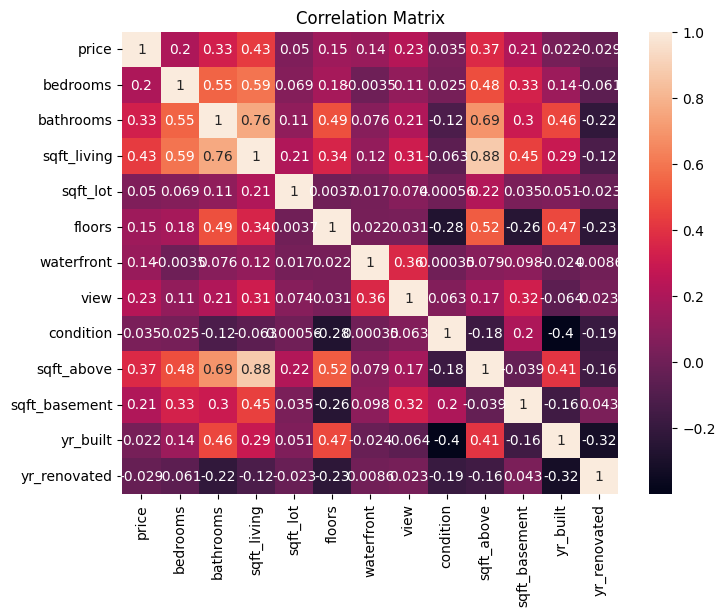

In [635]:
plt.figure(figsize=(8,6))

plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True)
plt.show()

In [636]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [637]:
new_df = df[['price','sqft_above','sqft_living', 'bedrooms']]
new_df

,price,sqft_above,sqft_living,bedrooms
0,3.130000e+05,1340,1340,3.0
1,2.384000e+06,3370,3650,5.0
2,3.420000e+05,1930,1930,3.0
3,4.200000e+05,1000,2000,3.0
4,5.500000e+05,1140,1940,4.0
...,...,...,...,...
4595,3.081667e+05,1510,1510,3.0
4596,5.343333e+05,1460,1460,3.0
4597,4.169042e+05,3010,3010,3.0
4598,2.034000e+05,1070,2090,4.0


Splitting dataset :

In [638]:
X = new_df.iloc[:,1:]
X

,sqft_above,sqft_living,bedrooms
0,1340,1340,3.0
1,3370,3650,5.0
2,1930,1930,3.0
3,1000,2000,3.0
4,1140,1940,4.0
...,...,...,...
4595,1510,1510,3.0
4596,1460,1460,3.0
4597,3010,3010,3.0
4598,1070,2090,4.0


In [639]:
y = new_df.iloc[:,0]
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [640]:
# Applying StandardScaler and then Train Test Split :
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.56522378, -0.82997105, -0.44112227],
       [ 1.78955903,  1.56852826,  1.75970468],
       [ 0.11917123, -0.21736733, -0.44112227],
       ...,
       [ 1.37196208,  0.90400897, -0.44112227],
       [-0.87842149, -0.05123751,  0.6592912 ],
       [-0.39122505, -0.67422434, -0.44112227]])

In [641]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [642]:
#checking shapes of each train & test sets :
print("Shape of X train : ",X_train.shape)
print("Shape of X test : ",X_test.shape)
print("Shape of y train : ",y_train.shape)
print("Shape of y test : ",y_test.shape)

Shape of X train :  (3220, 3)
Shape of X test :  (1380, 3)
Shape of y train :  (3220,)
Shape of y test :  (1380,)


Creating objects and applying for loop to get different measures and to check accuracy :

In [643]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=65,random_state=17)
dt = DecisionTreeRegressor(max_depth=3,random_state=31)
gb = GradientBoostingRegressor(n_estimators=75,random_state=31)

models = [lr,rf,dt,gb]

for i in models:
  print(i)
  i.fit(X_train,y_train)
  y_pred = i.predict(X_test)
  print("R2_score : ",r2_score(y_test,y_pred)*100)
  print("MeanAbsoluteError : ",mean_absolute_error(y_test,y_pred))
  print("MeanSquaredError : ",mean_squared_error(y_test,y_pred))
  print("RootMeanSquaredError : ",np.sqrt(mean_squared_error(y_test,y_pred)))
  print("_____________________________________________________________________")

LinearRegression()
R2_score :  42.71042935674244
MeanAbsoluteError :  180052.70683134915
MeanSquaredError :  75994812037.7798
RootMeanSquaredError :  275671.56552277895
_____________________________________________________________________
RandomForestRegressor(n_estimators=65, random_state=17)
R2_score :  15.447993956259843
MeanAbsoluteError :  202761.04469769727
MeanSquaredError :  112158526142.9687
RootMeanSquaredError :  334900.77059178095
_____________________________________________________________________
DecisionTreeRegressor(max_depth=3, random_state=31)
R2_score :  39.888918965651065
MeanAbsoluteError :  182183.75251731154
MeanSquaredError :  79737555253.09952
RootMeanSquaredError :  282378.390202047
_____________________________________________________________________
GradientBoostingRegressor(n_estimators=75, random_state=31)
R2_score :  35.67892836397243
MeanAbsoluteError :  184011.66335171624
MeanSquaredError :  85322122232.09888
RootMeanSquaredError :  292099.50741502264


Creating a Table for Comparing the Accuracy :

In [644]:
data = pd.DataFrame({ 'Without_FeatureSelection' : [52.32,46.01,47.71,33.07], 'With_FeatureSelection' : [42.71,15.45,39.89,35.68], ' PCA' : [52.32,46.01,47.71,33.07]},
                     index = ['LinearRegression','RandomForestRegressor','DecisionTreeRegressor','GradientBoostingRegressor'])
data

,Without_FeatureSelection,With_FeatureSelection,PCA
LinearRegression,52.32,42.71,52.32
RandomForestRegressor,46.01,15.45,46.01
DecisionTreeRegressor,47.71,39.89,47.71
GradientBoostingRegressor,33.07,35.68,33.07
